Function for converting a list of passed values into bins with certain bin size

In [1]:
def binnify(target_list, bin_size):

    target_list = list(target_list) # جهت اطمینان از لیست بودن پارامتر ارسال شده

    target_list.sort()

    bins = []

    bin_counter = 0

    while bin_counter < len(target_list):
        bin = target_list[bin_counter:bin_counter + bin_size]
        bin_counter += bin_size
        bins.append(bin)

    return bins

Function for combining a list of bins into a list of numbers.

In [2]:
def unbin(bins):
    result_list = []

    for bin in bins:
      for value in bin:
        result_list.append(value)

    return result_list

Function for Binning By Mean

In [3]:
import statistics

def binning_by_mean(target_list, bin_size):

    bins = binnify(target_list, bin_size)

    for i, bin in enumerate(bins):
        bin_mean = statistics.mean(bin)
        bins[i] = [bin_mean] * len(bin)

    return unbin(bins)

Function for Binning By Median

In [4]:
def binning_by_median(target_list, bin_size):

    bins = binnify(target_list, bin_size)

    for i, bin in enumerate(bins):
        bin_median = statistics.median(bin)
        bins[i] = [bin_median] * len(bin)

    return unbin(bins)

Function for Binning By Boundaries (of the given bins)

In [5]:
def binning_by_boundaries(target_list, bin_size):
    bins = binnify(target_list, bin_size)

    result = []

    for bin in bins:
        bin_max = max(bin)
        bin_min = min(bin)
        alternative_bin = []

        for value in bin:
            if abs(bin_max - value) <= abs(bin_min - value):
                alternative_bin.append(bin_max)
            else:
                alternative_bin.append(bin_min)

        result.append(alternative_bin)


    return unbin(result)

Loading the dataset and plotting the histogram

Text(0, 0.5, 'Frequency')

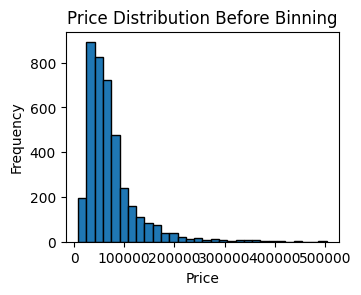

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# خواندن و نمایش اولیه دیتاست
df = pd.read_csv('./datasets/laptop.csv')
plt.figure(figsize=(12, 6))
plt.subplot(231)
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.title('Price Distribution Before Binning')
plt.xlabel('Price')
plt.ylabel('Frequency')

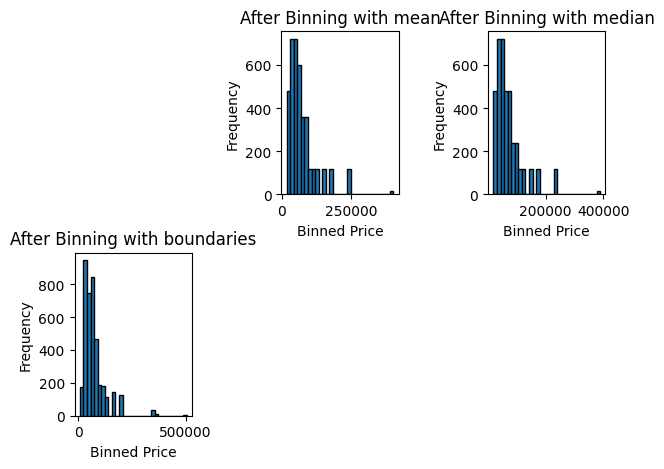

In [7]:
# receiving the bin size by user
bin_size = int(input('Enter bin size (preferably more than 100):'))

# binning by boundaries
boundaries_binned_prices = binning_by_boundaries(df['Price'].tolist(), bin_size)

# binning by mean of the bins
mean_binned_prices = binning_by_mean(df['Price'].tolist(), bin_size)

# binning by median of the bins
median_binned_prices = binning_by_median(df['Price'].tolist(), bin_size)

# انتساب مقادیری که از طریق بینینگ ستون قیمت بدست آمده به ستون جدید
df['Binned_Price_By_Boundaries'] = boundaries_binned_prices
df['Binned_Price_By_Mean'] = mean_binned_prices
df['Binned_Price_By_Median'] = median_binned_prices

# نمایش دیتاست بعد از ایجاد ستونی که از طریق اعمال تکنیک بینینگ روی ستون قیمت، بدست آمده
plt.subplot(232)
plt.hist(df['Binned_Price_By_Mean'], bins=30, edgecolor='black')
plt.title('After Binning with mean')
plt.xlabel('Binned Price')
plt.ylabel('Frequency')

plt.subplot(233)
plt.hist(df['Binned_Price_By_Median'], bins=30, edgecolor='black')
plt.title('After Binning with median')
plt.xlabel('Binned Price')
plt.ylabel('Frequency')

plt.subplot(234)
plt.hist(df['Binned_Price_By_Boundaries'], bins=30, edgecolor='black')
plt.title('After Binning with boundaries')
plt.xlabel('Binned Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()